In [7]:
!pip install scikit-surprise

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split # # Import Surprise package's data splitting function
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans

In [9]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/finaluserdata.csv")
df.head(50)

,id,userid,name,age,email,gender,country,currency,ip_address,timestamp
0,1,9654849844,Bernardo Ianni,40,bianni0@google.pl,Female,Japan,Yen,85.227.248.157,06-08-2022 00:00
1,2,3005988976,Aaren Comellini,52,acomellini1@hugedomains.com,Female,Nigeria,Naira,118.223.149.7,07-08-2022 00:00
2,3,7135525492,Aldrich Batisse,21,abatisse2@vk.com,Female,Belarus,Ruble,39.5.221.202,09-03-2022 00:00
3,4,9329709789,Murial Sendley,22,msendley3@gizmodo.com,Male,Pakistan,Rupee,77.3.163.200,11-30-2021
4,5,3923900300,Colette Matteini,39,cmatteini4@mashable.com,Male,Central African Republic,Franc,127.232.57.14,03-12-2022 00:00
5,6,4985705325,Kellina Skotcher,55,kskotcher5@usda.gov,Male,Sri Lanka,Rupee,222.4.35.79,01-29-2022
6,7,5545075654,Etti Snawden,56,esnawden6@microsoft.com,Male,Cameroon,Franc,127.240.186.189,12-07-2021 00:00
7,8,9091391586,Caroline McKimmey,55,cmckimmey7@linkedin.com,Female,Sri Lanka,Rupee,215.110.147.185,04-01-2022 00:00
8,9,7359739840,Cecilio Colthard,46,ccolthard8@geocities.jp,Male,Tanzania,Shilling,9.178.45.104,12-05-2021 00:00
9,10,5147528309,Abbe Maltby,26,amaltby9@gravatar.com,Male,Russia,Ruble,17.67.129.152,12-13-2021


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df1 = pd.read_csv("drive/MyDrive/Colab Notebooks/productlist.csv")
df1.head(50)

,id,productid,agestart,ageend,category
0,1,687494726,18,50,Female
1,2,928652763,18,60,Female/Male
2,3,1236913140,18,35,Male
3,4,57666869,18,41,Female/Male
4,5,740734642,18,27,Male
5,6,1251290254,18,51,Male
6,7,318886046,18,45,Male
7,8,741651013,18,41,Male
8,9,790351899,18,33,Female/Male
9,10,1537426137,18,37,Female/Male


In [12]:
print(df,"\n")
print(df1,"\n")

         id      userid                 name  age  \
0         1  9654849844       Bernardo Ianni   40   
1         2  3005988976      Aaren Comellini   52   
2         3  7135525492      Aldrich Batisse   21   
3         4  9329709789       Murial Sendley   22   
4         5  3923900300     Colette Matteini   39   
...     ...         ...                  ...  ...   
9995   9996  6824817134         Linet Jallin   30   
9996   9997  1538716009    Kirstin Merriment   31   
9997   9998  3301993982     Buffy Scholcroft   49   
9998   9999  5076523777  Denys Grzegorzewicz   22   
9999  10000  8944060259        Janey Kitchin   38   

                                email  gender                   country  \
0                   bianni0@google.pl  Female                     Japan   
1         acomellini1@hugedomains.com  Female                   Nigeria   
2                    abatisse2@vk.com  Female                   Belarus   
3               msendley3@gizmodo.com    Male                  

In [13]:
# method : isin() metthod
c_result = df[df.apply(tuple,1).isin(df1.apply(tuple,1))]
print(c_result)

Empty DataFrame
Columns: [id, userid, name, age, email, gender, country, currency, ip_address, timestamp]
Index: []


In [14]:
# method : merge() method
c_result_m = pd.merge(df,df1)
print(c_result_m)

      id      userid                name  age                        email  \
0      1  9654849844      Bernardo Ianni   40            bianni0@google.pl   
1      2  3005988976     Aaren Comellini   52  acomellini1@hugedomains.com   
2      3  7135525492     Aldrich Batisse   21             abatisse2@vk.com   
3      4  9329709789      Murial Sendley   22        msendley3@gizmodo.com   
4      5  3923900300    Colette Matteini   39      cmatteini4@mashable.com   
..   ...         ...                 ...  ...                          ...   
994  995  8825720920      Frances Baudic   37       fbaudicrm@symantec.com   
995  996  7142884645      Lotti Guinnane   58       lguinnanern@tripod.com   
996  997  5360826403  Francklyn Spaducci   51        fspaducciro@cisco.com   
997  998  4077749704       Louise Rodman   51       lrodmanrp@gravatar.com   
998  999  7074406112        Harrie Coper   22            hcoperrq@ucsd.edu   

     gender                   country currency      ip_address 

In [15]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   userid      10000 non-null  int64 
 2   name        10000 non-null  object
 3   age         10000 non-null  int64 
 4   email       10000 non-null  object
 5   gender      10000 non-null  object
 6   country     10000 non-null  object
 7   currency    10000 non-null  object
 8   ip_address  10000 non-null  object
 9   timestamp   10000 non-null  object
dtypes: int64(3), object(7)
memory usage: 781.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         999 non-null    int64 
 1   productid  999 non-null    int64 
 2   agestart   999 non-null    int64 
 3   ageend     999 non-null    int64 
 4   category   999 no

In [16]:
df.shape

(10000, 10)

In [17]:
df1.shape

(999, 5)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5.000500e+03,2.886896e+03,1.0,2.500750e+03,5.000500e+03,7.500250e+03,1.000000e+04
userid,10000.0,4.957214e+09,2.891884e+09,3267553.0,2.432513e+09,4.976502e+09,7.445113e+09,9.998946e+09
age,10000.0,3.915580e+01,1.239624e+01,18.0,2.800000e+01,3.900000e+01,5.000000e+01,6.000000e+01


In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,999.0,5.000000e+02,2.885308e+02,1.0,250.5,500.0,7.495000e+02,9.990000e+02
productid,999.0,9.861797e+08,5.690993e+08,4812557.0,499798615.0,958360649.0,1.477304e+09,1.998114e+09
agestart,999.0,1.800000e+01,0.000000e+00,18.0,18.0,18.0,1.800000e+01,1.800000e+01
ageend,999.0,4.001201e+01,1.155799e+01,21.0,30.0,40.0,5.000000e+01,6.000000e+01


In [20]:
# User Count of male and female acccording to Category
counts = df.groupby(['age', 'gender']).age.count().unstack()
print(counts)

gender  Female  Male
age                 
18         113   106
19         113   114
20         115   108
21         121   106
22         102   112
23         119   124
24         121   110
25         118    95
26         111   106
27         130   115
28         109   147
29         100   124
30         127   127
31         130   120
32         116   113
33         121   117
34         114   116
35         122    92
36         114   116
37         123   118
38         111   113
39         110   112
40         110   122
41         124   122
42         114   112
43         100   113
44         122   110
45         115   120
46         125   111
47         109   110
48         116   120
49         120   131
50          92   133
51         125   121
52         132   111
53          94   102
54         156   129
55         110   113
56         117   119
57         130   118
58         123   123
59         118    93
60         124   120


In [21]:
# Product Count of male and female acccording to Category
counts1 = df1.groupby(['agestart','ageend', 'category']).ageend.count().unstack()
print(counts1)

category         Female  Female/Male  Male
agestart ageend                           
18       21         NaN          8.0  12.0
         22         NaN         11.0  19.0
         23         NaN         11.0  13.0
         24         NaN         12.0  12.0
         25         NaN         14.0  21.0
         26         NaN         12.0  13.0
         27         NaN         15.0  20.0
         28         NaN         13.0  16.0
         29         NaN          4.0  13.0
         30         NaN         18.0  15.0
         31         NaN         11.0  11.0
         32         NaN          9.0  10.0
         33         NaN         20.0  14.0
         34         NaN         13.0  15.0
         35         NaN          9.0  15.0
         36         NaN         13.0  14.0
         37         NaN         14.0   7.0
         38         NaN          9.0  12.0
         39         NaN         12.0   9.0
         40         NaN          8.0  13.0
         41         NaN         15.0  10.0
         42

<Axes: xlabel='age'>

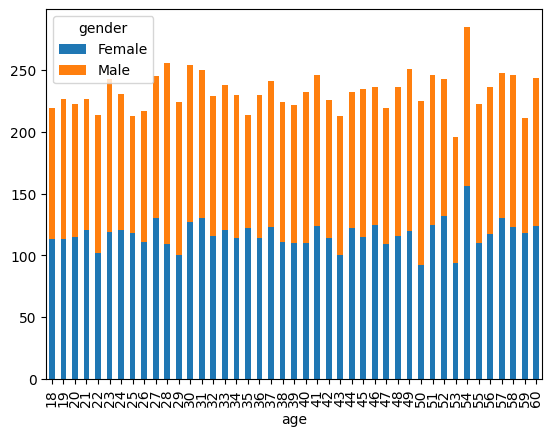

In [22]:
#Graph Representation according to male female with age
counts.plot(kind='bar', stacked=True)

<Axes: xlabel='agestart,ageend'>

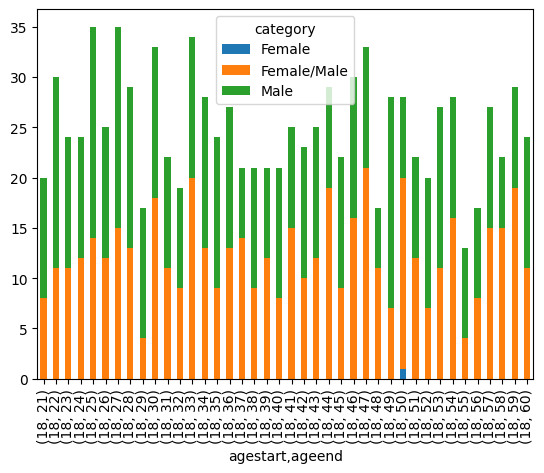

In [23]:
#Graph Representation according to male female with age
counts1.plot(kind='bar', stacked=True)

In [24]:
#checking all product are unique or not
print('Number of unique products', len(df1['productid'].unique()))

Number of unique products 999


In [25]:
#checking all product are unique or not
print('Number of unique Users', len(df['userid'].unique()))

Number of unique Users 10000


In [26]:
#conditon for gender
dfch=df[df['gender']=='Male']
dfch.head()

,id,userid,name,age,email,gender,country,currency,ip_address,timestamp
3,4,9329709789,Murial Sendley,22,msendley3@gizmodo.com,Male,Pakistan,Rupee,77.3.163.200,11-30-2021
4,5,3923900300,Colette Matteini,39,cmatteini4@mashable.com,Male,Central African Republic,Franc,127.232.57.14,03-12-2022 00:00
5,6,4985705325,Kellina Skotcher,55,kskotcher5@usda.gov,Male,Sri Lanka,Rupee,222.4.35.79,01-29-2022
6,7,5545075654,Etti Snawden,56,esnawden6@microsoft.com,Male,Cameroon,Franc,127.240.186.189,12-07-2021 00:00
8,9,7359739840,Cecilio Colthard,46,ccolthard8@geocities.jp,Male,Tanzania,Shilling,9.178.45.104,12-05-2021 00:00


In [27]:
# Filter on value in range of initial and final
dfs = c_result_m.loc[(c_result_m['age'] >= c_result_m['agestart']) & (c_result_m['age'] <= c_result_m['ageend']), 'age']

dfs.count()

521

In [28]:
# Filter on value in range of initial and final
dfs = c_result_m.loc[(c_result_m['age'] >= c_result_m['agestart']) & (c_result_m['age'] <= c_result_m['ageend']), 'age']

dfs

0      40
1      52
2      21
3      22
9      26
       ..
991    32
992    28
993    26
997    51
998    22
Name: age, Length: 521, dtype: int64

In [29]:
# Filter on value in range of initial and final
dfs = c_result_m.loc[(c_result_m['age'] >= c_result_m['agestart']) & (c_result_m['age'] <= c_result_m['ageend']), 'userid']

df1

,id,productid,agestart,ageend,category
0,1,687494726,18,50,Female
1,2,928652763,18,60,Female/Male
2,3,1236913140,18,35,Male
3,4,57666869,18,41,Female/Male
4,5,740734642,18,27,Male
...,...,...,...,...,...
994,995,762162696,18,22,Male
995,996,76656739,18,35,Female/Male
996,997,1236824573,18,27,Male
997,998,285010004,18,58,Male


In [30]:
pd.merge(df, df1)[["age", "productid", "userid"]]

,age,productid,userid
0,40,687494726,9654849844
1,52,928652763,3005988976
2,21,1236913140,7135525492
3,22,57666869,9329709789
4,39,740734642,3923900300
...,...,...,...
994,37,762162696,8825720920
995,58,76656739,7142884645
996,51,1236824573,5360826403
997,51,285010004,4077749704


In [31]:
df.set_index('age').combine_first(df1.set_index('ageend')).reset_index()

,index,agestart,category,country,currency,email,gender,id,ip_address,name,productid,timestamp,userid
0,18,NaN,NaN,Russia,Ruble,apadilloo@woothemes.com,Female,25,186.15.228.17,Almeria Padillo,NaN,06-10-2022 00:00,9735696214
1,18,NaN,NaN,Egypt,Pound,ckittow1i@sina.com.cn,Female,55,139.200.124.228,Cherri Kittow,NaN,02-11-2022 00:00,250553279
2,18,NaN,NaN,Brazil,Real,dscottini27@ed.gov,Female,80,14.171.120.32,Danita Scottini,NaN,5-18-2022,1258163321
3,18,NaN,NaN,Kuwait,Dinar,fdumigan3s@mapquest.com,Male,137,253.46.71.87,Ferdinand Dumigan,NaN,9-20-2022,6567163429
4,18,NaN,NaN,Indonesia,Rupiah,hilive3y@amazon.co.uk,Male,143,117.90.171.179,Herc Ilive,NaN,6-23-2022,4993300994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233853,60,18.0,Female/Male,Morocco,Dirham,adenidgerj@dion.ne.jp,Female,9992,107.127.61.1,Allyn Denidge,1.650565e+09,10-11-2022 00:00,2502395331
233854,60,18.0,Male,Morocco,Dirham,adenidgerj@dion.ne.jp,Female,9992,107.127.61.1,Allyn Denidge,9.553492e+08,10-11-2022 00:00,2502395331
233855,60,18.0,Female/Male,Morocco,Dirham,adenidgerj@dion.ne.jp,Female,9992,107.127.61.1,Allyn Denidge,6.728052e+08,10-11-2022 00:00,2502395331
233856,60,18.0,Male,Morocco,Dirham,adenidgerj@dion.ne.jp,Female,9992,107.127.61.1,Allyn Denidge,1.722299e+09,10-11-2022 00:00,2502395331


In [32]:
#Data Preprocessing
#Now that we have imported the dataset, we will perform data preprocessing.
X = df.iloc[:,:-1].values

In [33]:
X1 = c_result_m.iloc[:,:-1].values ##independent variable array

In [34]:
y1 = c_result_m.iloc[:,1].values ##dependent variable vector

In [35]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=1/3,random_state=0)

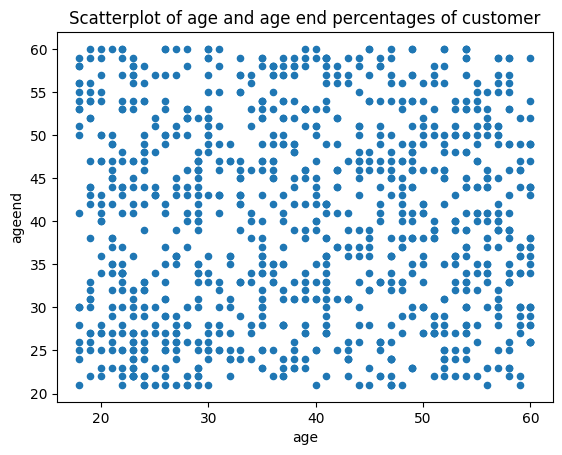

In [36]:
c_result_m.plot.scatter(x='age', y='ageend', title='Scatterplot of age and age end percentages of customer');

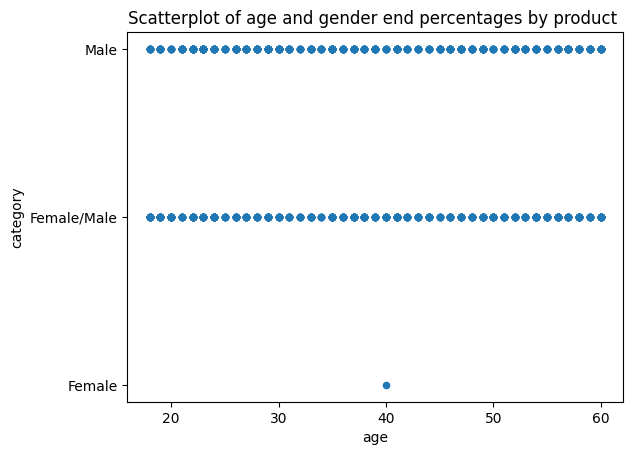

In [37]:
c_result_m.plot.scatter(x='age', y='category', title='Scatterplot of age and gender end percentages by product ');

In [38]:
y = c_result_m['age'].values.reshape(-1, 1)
X = c_result_m['ageend'].values.reshape(-1, 1)

In [39]:
#Scikit-Learn's linear regression model expects a 2D input,
#and we're really offering a 1D array if we just extract the values:
print(c_result_m['age'].values)
print(c_result_m['age'].values.shape)

[40 52 21 22 39 55 56 55 46 26 50 43 42 26 53 23 60 23 23 38 47 37 33 38
 18 50 43 57 22 40 23 54 48 24 47 20 49 37 19 28 37 35 33 59 20 27 35 43
 24 25 39 43 49 28 18 23 20 42 30 54 22 58 32 49 21 44 36 30 29 52 22 26
 54 55 38 21 29 52 46 18 59 27 46 19 22 38 52 27 41 39 25 45 33 24 36 36
 52 26 59 20 30 40 37 42 54 54 49 54 58 25 30 60 60 47 28 50 28 20 23 45
 31 29 38 42 27 46 54 51 55 42 55 49 34 39 37 19 18 55 36 58 35 20 18 40
 40 50 31 24 25 48 43 39 40 19 31 55 27 19 24 23 56 24 26 57 40 36 47 55
 48 31 32 41 51 20 37 45 38 39 53 56 39 49 45 21 59 59 52 40 45 57 57 33
 30 39 19 38 59 57 30 30 30 45 23 29 57 20 54 19 41 36 27 37 60 31 21 52
 57 40 38 23 36 25 56 59 20 56 31 29 42 27 25 37 40 35 23 58 20 24 21 26
 47 28 54 27 21 54 60 44 27 36 22 18 23 55 40 35 59 56 35 24 41 23 31 24
 39 59 50 58 20 27 36 47 58 20 29 22 57 46 53 60 56 31 39 52 44 33 47 39
 54 46 22 41 35 26 38 54 38 40 30 35 24 19 29 35 49 49 33 30 29 23 57 60
 42 28 29 37 53 31 54 28 50 60 20 30 20 48 23 30 30

In [40]:
print(X.shape)

(999, 1)


In [41]:
#LinearRegression() class (more on it later) expects entries that may contain more than a single value (but can also be a single value)
print(X)

[[50]
 [60]
 [35]
 [41]
 [27]
 [51]
 [45]
 [41]
 [33]
 [37]
 [41]
 [24]
 [57]
 [31]
 [43]
 [22]
 [28]
 [31]
 [44]
 [57]
 [50]
 [23]
 [33]
 [25]
 [30]
 [38]
 [31]
 [59]
 [53]
 [51]
 [45]
 [25]
 [29]
 [22]
 [34]
 [47]
 [60]
 [41]
 [44]
 [44]
 [35]
 [54]
 [45]
 [30]
 [50]
 [26]
 [54]
 [24]
 [49]
 [21]
 [39]
 [22]
 [54]
 [26]
 [58]
 [57]
 [27]
 [49]
 [21]
 [59]
 [34]
 [23]
 [35]
 [23]
 [25]
 [26]
 [33]
 [57]
 [46]
 [24]
 [34]
 [57]
 [30]
 [32]
 [48]
 [27]
 [22]
 [25]
 [58]
 [56]
 [36]
 [50]
 [33]
 [52]
 [35]
 [58]
 [46]
 [51]
 [56]
 [51]
 [23]
 [60]
 [29]
 [46]
 [57]
 [47]
 [29]
 [29]
 [44]
 [50]
 [50]
 [39]
 [49]
 [56]
 [48]
 [32]
 [35]
 [39]
 [57]
 [43]
 [48]
 [43]
 [44]
 [46]
 [21]
 [30]
 [21]
 [27]
 [22]
 [39]
 [43]
 [30]
 [49]
 [46]
 [27]
 [42]
 [57]
 [38]
 [44]
 [37]
 [34]
 [23]
 [56]
 [28]
 [57]
 [52]
 [56]
 [56]
 [35]
 [33]
 [52]
 [41]
 [50]
 [25]
 [45]
 [42]
 [55]
 [47]
 [30]
 [54]
 [47]
 [53]
 [42]
 [32]
 [46]
 [41]
 [21]
 [60]
 [54]
 [25]
 [40]
 [58]
 [42]
 [56]
 [33]
 [58]
 [36

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
SEED = 42


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [45]:
print(X_train)

[[45]
 [36]
 [58]
 [59]
 [47]
 [26]
 [26]
 [41]
 [23]
 [36]
 [49]
 [32]
 [29]
 [58]
 [48]
 [49]
 [42]
 [43]
 [57]
 [21]
 [40]
 [47]
 [21]
 [25]
 [35]
 [35]
 [44]
 [41]
 [57]
 [43]
 [22]
 [25]
 [58]
 [27]
 [60]
 [46]
 [41]
 [40]
 [60]
 [41]
 [34]
 [43]
 [60]
 [25]
 [35]
 [41]
 [33]
 [55]
 [36]
 [37]
 [34]
 [22]
 [49]
 [33]
 [35]
 [39]
 [34]
 [27]
 [51]
 [41]
 [54]
 [29]
 [46]
 [25]
 [30]
 [49]
 [52]
 [32]
 [48]
 [29]
 [22]
 [22]
 [37]
 [21]
 [37]
 [37]
 [27]
 [50]
 [38]
 [57]
 [47]
 [21]
 [44]
 [28]
 [46]
 [47]
 [45]
 [47]
 [45]
 [36]
 [22]
 [31]
 [56]
 [57]
 [26]
 [21]
 [50]
 [41]
 [41]
 [45]
 [37]
 [46]
 [60]
 [35]
 [33]
 [23]
 [30]
 [41]
 [27]
 [34]
 [30]
 [42]
 [36]
 [45]
 [25]
 [52]
 [31]
 [41]
 [36]
 [56]
 [30]
 [46]
 [51]
 [46]
 [34]
 [33]
 [59]
 [31]
 [28]
 [54]
 [44]
 [22]
 [60]
 [50]
 [48]
 [28]
 [50]
 [38]
 [38]
 [26]
 [38]
 [50]
 [42]
 [35]
 [31]
 [39]
 [23]
 [40]
 [44]
 [47]
 [49]
 [24]
 [42]
 [23]
 [44]
 [50]
 [23]
 [45]
 [22]
 [59]
 [52]
 [41]
 [33]
 [53]
 [40]
 [23]
 [54

In [46]:
print(y_train)

[[33]
 [47]
 [36]
 [57]
 [29]
 [38]
 [44]
 [20]
 [21]
 [32]
 [55]
 [57]
 [57]
 [35]
 [25]
 [59]
 [48]
 [27]
 [47]
 [25]
 [46]
 [40]
 [18]
 [23]
 [27]
 [53]
 [49]
 [26]
 [22]
 [20]
 [24]
 [54]
 [37]
 [24]
 [30]
 [44]
 [22]
 [57]
 [30]
 [49]
 [49]
 [25]
 [54]
 [52]
 [22]
 [23]
 [46]
 [55]
 [59]
 [43]
 [25]
 [20]
 [26]
 [50]
 [21]
 [40]
 [41]
 [22]
 [55]
 [43]
 [50]
 [26]
 [59]
 [58]
 [60]
 [21]
 [37]
 [24]
 [24]
 [35]
 [23]
 [23]
 [22]
 [59]
 [26]
 [59]
 [41]
 [27]
 [21]
 [41]
 [23]
 [26]
 [46]
 [37]
 [39]
 [23]
 [38]
 [29]
 [52]
 [43]
 [55]
 [42]
 [52]
 [43]
 [60]
 [29]
 [52]
 [55]
 [55]
 [36]
 [54]
 [51]
 [28]
 [50]
 [26]
 [29]
 [57]
 [18]
 [19]
 [39]
 [49]
 [41]
 [53]
 [29]
 [22]
 [42]
 [40]
 [54]
 [60]
 [18]
 [25]
 [29]
 [57]
 [45]
 [21]
 [41]
 [22]
 [19]
 [39]
 [24]
 [60]
 [52]
 [21]
 [40]
 [53]
 [18]
 [53]
 [41]
 [49]
 [18]
 [34]
 [51]
 [46]
 [36]
 [43]
 [29]
 [25]
 [48]
 [49]
 [29]
 [31]
 [52]
 [41]
 [49]
 [24]
 [26]
 [23]
 [40]
 [29]
 [23]
 [19]
 [50]
 [40]
 [22]
 [29]
 [39]
 [23

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [48]:
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
print(regressor.intercept_)

[38.11668902]


In [50]:
print(regressor.coef_)

[[0.0269173]]


In [51]:
def calc(age, intercept, ageend):
    return age*intercept+ageend

score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[10.52599835]]


In [52]:
score = regressor.predict([[9.5]])
print(score)

[[38.37240337]]


In [53]:
y_pred = regressor.predict(X_test)

In [54]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
0        33  39.597141
1        42  39.301050
2        36  39.435637
3        23  38.897291
4        35  39.031877
..      ...        ...
195      46  39.677892
196      40  39.489471
197      46  38.708870
198      23  39.624058
199      33  39.004960

[200 rows x 2 columns]


In [55]:
y2 = c_result_m['age'].values.reshape(-1, 1)
X2 = c_result_m['category'].values.reshape(-1, 1)

In [56]:
print(c_result_m['category'].values)
print(c_result_m['category'].values.shape)

['Female' 'Female/Male' 'Male' 'Female/Male' 'Male' 'Male' 'Male' 'Male'
 'Female/Male' 'Female/Male' 'Female/Male' 'Female/Male' 'Female/Male'
 'Male' 'Female/Male' 'Male' 'Male' 'Female/Male' 'Female/Male'
 'Female/Male' 'Female/Male' 'Female/Male' 'Female/Male' 'Female/Male'
 'Female/Male' 'Female/Male' 'Male' 'Female/Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Female/Male' 'Female/Male' 'Female/Male'
 'Female/Male' 'Male' 'Female/Male' 'Female/Male' 'Female/Male' 'Male'
 'Female/Male' 'Female/Male' 'Male' 'Female/Male' 'Female/Male' 'Male'
 'Male' 'Female/Male' 'Male' 'Male' 'Male' 'Female/Male' 'Female/Male'
 'Female/Male' 'Male' 'Male' 'Female/Male' 'Female/Male' 'Female/Male'
 'Male' 'Male' 'Male' 'Female/Male' 'Male' 'Male' 'Male' 'Male'
 'Female/Male' 'Male' 'Female/Male' 'Female/Male' 'Male' 'Male'
 'Female/Male' 'Male' 'Male' 'Male' 'Male' 'Female/Male' 'Male' 'Male'
 'Male' 'Female/Male' 'Female/Male' 'Male' 'Male' 'Female/Male' 'Male'
 'Female/Male' 'Male' 'Female/Ma

In [57]:
c_result_m.head(1)

,id,userid,name,age,email,gender,country,currency,ip_address,timestamp,productid,agestart,ageend,category
0,1,9654849844,Bernardo Ianni,40,bianni0@google.pl,Female,Japan,Yen,85.227.248.157,06-08-2022 00:00,687494726,18,50,Female


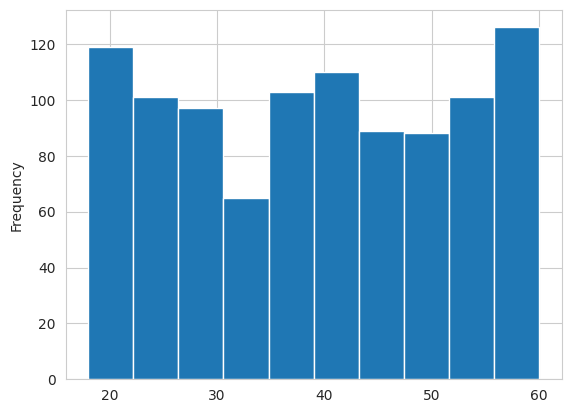

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
data = c_result_m
sns.set_style('whitegrid')
#Binning on renta, age, antiguedad
data['age'].plot(kind='hist')
plt.show()


In [59]:
X4 = c_result_m.iloc[:, [2,12]].values
y4 = c_result_m.iloc[:, -2].values

In [60]:
#Introduction
#K Nearest Neighbor image
#our dataset containing character variables we have to encode it using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X4[:,0] = le.fit_transform(X4[:,0])

In [61]:
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.20, random_state = 0)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)


In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X4_train, y4_train)


KNeighborsClassifier()

In [64]:
y4_pred = classifier.predict(X4_test)

In [65]:
#We can evaluate our model using the confusion matrix and accuracy score by comparing the predicted and actual test values
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y4_test, y4_pred)
ac = accuracy_score(y4_test,y4_pred)

In [66]:
print(cm)
print(ac)

[[2 3 0 ... 0 0 0]
 [1 3 0 ... 0 0 0]
 [1 2 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 1 0 2]]
0.35


In [67]:
df.head()

,id,userid,name,age,email,gender,country,currency,ip_address,timestamp
0,1,9654849844,Bernardo Ianni,40,bianni0@google.pl,Female,Japan,Yen,85.227.248.157,06-08-2022 00:00
1,2,3005988976,Aaren Comellini,52,acomellini1@hugedomains.com,Female,Nigeria,Naira,118.223.149.7,07-08-2022 00:00
2,3,7135525492,Aldrich Batisse,21,abatisse2@vk.com,Female,Belarus,Ruble,39.5.221.202,09-03-2022 00:00
3,4,9329709789,Murial Sendley,22,msendley3@gizmodo.com,Male,Pakistan,Rupee,77.3.163.200,11-30-2021
4,5,3923900300,Colette Matteini,39,cmatteini4@mashable.com,Male,Central African Republic,Franc,127.232.57.14,03-12-2022 00:00


In [68]:
#SVM
x=df.drop("age", axis=1)
x=x.drop("currency", axis=1)
x=x.drop("name", axis=1)
x=x.drop("email", axis=1)
x=x.drop("gender", axis=1)
x=x.drop("country", axis=1)
x=x.drop("ip_address",axis=1)
x=x.drop("timestamp", axis=1)
x=x.drop("id",axis=1)
y=df["age"]

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.5)
z=list(y_train)
ytest=list(y_test)

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train,z)
output=list(svclassifier.predict(x_test))
output

In [ ]:
p=df.drop("age", axis=1)
p=p.drop("id",axis=1)


In [ ]:
output=list(svclassifier.predict(p))
predicted=list(output)


In [ ]:

ids=list(df1["id"])
print("id       class");

In [ ]:
for x in range(0,len(predicted)):
    print(ids[x] +"    ------>   " +predicted[x])